In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [9]:
X = pd.read_csv('ECG_dataX.csv')
Y = pd.read_csv('ECG_dataY.csv')

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836,0.900452,0.742081,0.665158,0.660634,0.638009,0.619910,0.583710,0.538462,0.470588,0.407240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3837,0.983135,0.915675,0.838294,0.743056,0.607143,0.466270,0.340278,0.256944,0.186508,0.141865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3838,0.612179,0.477564,0.439103,0.432692,0.419872,0.391026,0.355769,0.291667,0.214744,0.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3839,0.688752,0.607088,0.496148,0.382126,0.241911,0.134052,0.050847,0.009245,0.007704,0.043143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
XandY = X
XandY['class_labels'] = Y.class_label.to_list()
XandY

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class_labels
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836,0.900452,0.742081,0.665158,0.660634,0.638009,0.619910,0.583710,0.538462,0.470588,0.407240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3837,0.983135,0.915675,0.838294,0.743056,0.607143,0.466270,0.340278,0.256944,0.186508,0.141865,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3838,0.612179,0.477564,0.439103,0.432692,0.419872,0.391026,0.355769,0.291667,0.214744,0.102564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3839,0.688752,0.607088,0.496148,0.382126,0.241911,0.134052,0.050847,0.009245,0.007704,0.043143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [29]:
sampleFreq = 125
sampleInterval = 1/sampleFreq
n = 187 #number of timepoints
duration = n*sampleInterval
t = np.linspace(0,duration-sampleInterval, n)
print(len(t),'\n {}'.format(t))

187 
 [0.    0.008 0.016 0.024 0.032 0.04  0.048 0.056 0.064 0.072 0.08  0.088
 0.096 0.104 0.112 0.12  0.128 0.136 0.144 0.152 0.16  0.168 0.176 0.184
 0.192 0.2   0.208 0.216 0.224 0.232 0.24  0.248 0.256 0.264 0.272 0.28
 0.288 0.296 0.304 0.312 0.32  0.328 0.336 0.344 0.352 0.36  0.368 0.376
 0.384 0.392 0.4   0.408 0.416 0.424 0.432 0.44  0.448 0.456 0.464 0.472
 0.48  0.488 0.496 0.504 0.512 0.52  0.528 0.536 0.544 0.552 0.56  0.568
 0.576 0.584 0.592 0.6   0.608 0.616 0.624 0.632 0.64  0.648 0.656 0.664
 0.672 0.68  0.688 0.696 0.704 0.712 0.72  0.728 0.736 0.744 0.752 0.76
 0.768 0.776 0.784 0.792 0.8   0.808 0.816 0.824 0.832 0.84  0.848 0.856
 0.864 0.872 0.88  0.888 0.896 0.904 0.912 0.92  0.928 0.936 0.944 0.952
 0.96  0.968 0.976 0.984 0.992 1.    1.008 1.016 1.024 1.032 1.04  1.048
 1.056 1.064 1.072 1.08  1.088 1.096 1.104 1.112 1.12  1.128 1.136 1.144
 1.152 1.16  1.168 1.176 1.184 1.192 1.2   1.208 1.216 1.224 1.232 1.24
 1.248 1.256 1.264 1.272 1.28  1.288 1.296 1.304

In [52]:
classes = {}
for i in range (5):
    classes[i] = []
    for k in range(3):
        cls = XandY[XandY['class_labels'] == i]
        classes[i].append(cls.iloc[k,0:187])

{0: [0      0.977941
  1      0.926471
  2      0.681373
  3      0.245098
  4      0.154412
           ...   
  182    0.000000
  183    0.000000
  184    0.000000
  185    0.000000
  186    0.000000
  Name: 0, Length: 187, dtype: float64, 0      0.960114
  1      0.863248
  2      0.461538
  3      0.196581
  4      0.094017
           ...   
  182    0.000000
  183    0.000000
  184    0.000000
  185    0.000000
  186    0.000000
  Name: 1, Length: 187, dtype: float64, 0      1.000000
  1      0.659459
  2      0.186486
  3      0.070270
  4      0.070270
           ...   
  182    0.000000
  183    0.000000
  184    0.000000
  185    0.000000
  186    0.000000
  Name: 2, Length: 187, dtype: float64], 1: [0      1.000000
  1      0.666667
  2      0.100457
  3      0.036530
  4      0.073059
           ...   
  182    0.000000
  183    0.000000
  184    0.000000
  185    0.000000
  186    0.000000
  Name: 800, Length: 187, dtype: float64, 0      0.983696
  1      1.000000
  2      0

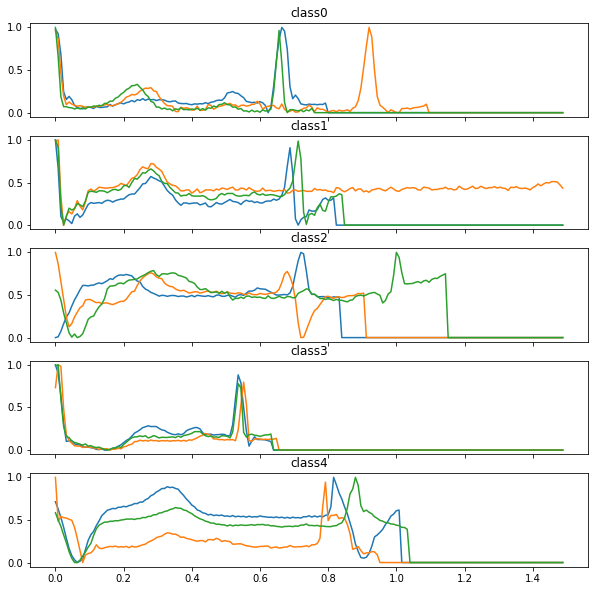

In [62]:
def plot(classesDict):

    figure, axis = plt.subplots(5, sharex=True, sharey=True, figsize=(10,10))
    for j in range(5):
        axis[j].set_title("class{}".format(j))
        for l in range(3):
            c = classesDict[j]
            axis[j].plot(t,c[l])
plot(classes)

In [69]:
#train-test split
x_arr = X.values
y_arr = Y.values
X_train, X_test, Y_train, Y_test = train_test_split(x_arr,y_arr, test_size = 0.2, random_state=0)

In [75]:
#train KNN classifier

knnModel = KNeighborsClassifier(n_neighbors = 10)
knnModel.fit(X_train,Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [81]:
Y_train_pred = knnModel.predict(X_train)
print("accuracy on Train Set: \n", accuracy_score(Y_train_pred,Y_train)) 

accuracy on Train Set: 
 0.9599609375


In [83]:
Y_test_pred = knnModel.predict(X_test)
print("accuracy on Test Set: \n", accuracy_score(Y_test_pred,Y_test)) 

accuracy on Test Set: 
 0.9713914174252276


In [102]:
Y_test = Y_test.ravel()

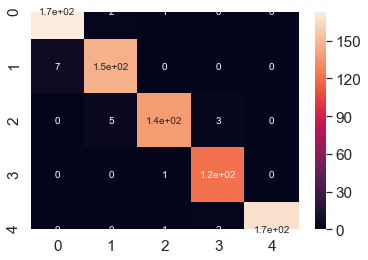

In [111]:
cf_matrix = confusion_matrix(Y_test, Y_test_pred)
sn.heatmap(cf_matrix, annot=True)